In [1]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import tensorflow as tf

In [2]:
from google.colab import drive
# Montar Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Verificar si la GPU está disponible
if tf.test.is_gpu_available():
    # Configurar el dispositivo para utilizar la GPU
    device = tf.device('/GPU:0')
else:
    # Si la GPU no está disponible, utiliza la CPU
    device = tf.device('/CPU:0')

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Tamaño de las imágenes: (760, 256, 256, 3)
Tamaño de las etiquetas: (760,)


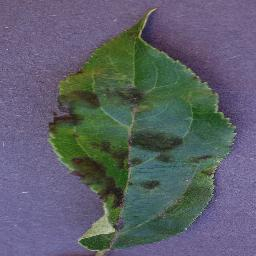

In [4]:
with device:
    # Ruta a la carpeta del conjunto de datos en Google Drive
    data_folders =  ["/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Apple___Apple_scab",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Apple___Black_rot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Apple___Cedar_apple_rust",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Apple___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Blueberry___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Cherry___Powdery_mildew",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Cherry___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Corn___Cercospora_leaf_spot Gray_leaf_spot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Corn___Common_rust",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Corn___Northern_Leaf_Blight",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Corn___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Grape___Black_rot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Grape___Esca_(Black_Measles)",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Grape___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Orange___Haunglongbing_(Citrus_greening)",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Peach___Bacterial_spot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Peach___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Pepper,_bell___Bacterial_spot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Pepper,_bell___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Potato___Early_blight",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Potato___Late_blight",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Potato___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Raspberry___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Soybean___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Squash___Powdery_mildew",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Strawberry___Leaf_scorch",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Strawberry___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Bacterial_spot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Early_blight",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Late_blight",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Leaf_Mold",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Septoria_leaf_spot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Spider_mites Two-spotted_spider_mite",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Target_Spot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Tomato_Yellow_Leaf_Curl_Virus",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Tomato_mosaic_virus",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___healthy"]

    # Definir las etiquetas correspondientes
    labels = {
        "Apple___Apple_scab": 1,
        "Apple___Black_rot": 1,
        "Apple___Cedar_apple_rust": 1,
        "Apple___healthy": 0,
        "Blueberry___healthy": 0,
        "Cherry___Powdery_mildew": 1,
        "Cherry___healthy": 0,
        "Corn___Cercospora_leaf_spot Gray_leaf_spot":1,
        "Corn___Common_rust":1,
        "Corn___Northern_Leaf_Blight":1,
        "Corn___healthy":0,
        "Grape___Black_rot":1,
        "Grape___Esca_(Black_Measles)":1,
        "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)":1,
        "Grape___healthy":0,
        "Orange___Haunglongbing_(Citrus_greening)":1,
        "Peach___Bacterial_spot":1,
        "Peach___healthy":0,
        "Pepper,_bell___Bacterial_spot":1,
        "Pepper,_bell___healthy":0,
        "Potato___Early_blight":1,
        "Potato___Late_blight":1,
        "Potato___healthy":0,
        "Raspberry___healthy":0,
        "Soybean___healthy":0,
        "Squash___Powdery_mildew":1,
        "Strawberry___Leaf_scorch":1,
        "Strawberry___healthy":0,
        "Tomato___Bacterial_spot":1,
        "Tomato___Early_blight":1,
        "Tomato___Late_blight":1,
        "Tomato___Leaf_Mold":1,
        "Tomato___Septoria_leaf_spot":1,
        "Tomato___Spider_mites Two-spotted_spider_mite":1,
        "Tomato___Target_Spot":1,
        "Tomato___Tomato_Yellow_Leaf_Curl_Virus":1,
        "Tomato___Tomato_mosaic_virus":1,
        "Tomato___healthy":0
    }

    # Listas para almacenar las imágenes y las etiquetas
    images = []
    label_list = []

    # Recorrer las carpetas y cargar las imágenes
    for folder in data_folders:
        label = labels.get(os.path.basename(folder), 0)  # Obtener la etiqueta correspondiente
        #print(folder)
        count = 0  # Variable de conteo
        for filename in os.listdir(folder):
            if count >= 20:  # Controlar el número de archivos leídos
              break
            if filename.endswith(".JPG"):
                #print(filename)
                image_path = os.path.join(folder, filename)
                image = cv2.imread(image_path)
                images.append(image)
                label_list.append(label)
            if filename.endswith(".jpg"):
                #print(filename)
                image_path = os.path.join(folder, filename)
                image = cv2.imread(image_path)
                images.append(image)
                label_list.append(label)
            count += 1  # Incrementar el conteo

    # Convertir las listas de imágenes y etiquetas a arreglos numpy
    images = np.array(images)
    labels = np.array(label_list)

    # Imprimir el tamaño de las imágenes y las etiquetas
    print("Tamaño de las imágenes:", images.shape)
    print("Tamaño de las etiquetas:", labels.shape)

    cv2_imshow(images[2])

In [5]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

with device:

    # Dividir los datos etiquetados en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
    print(X_train.shape)
    print(X_test.shape)
    print(y_train.shape)
    print(y_test.shape)
    # Preprocesamiento y normalización de los datos de entrada (imágenes)
    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0

    # Dividir el conjunto sin etiquetas para entrenar el autoencoder
    X_unlabeled, _, _, _ = train_test_split(images, labels, test_size=1, random_state=42)


del images
del labels

(608, 256, 256, 3)
(152, 256, 256, 3)
(608,)
(152,)


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize, LabelBinarizer, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, auc, roc_auc_score, roc_curve, f1_score

def computeMetrics(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)        # Calcular la exactitud
    prec = precision_score(y_test, y_pred, average='macro')      # Calcular la precisión
    rec = recall_score(y_test, y_pred)          # Calcular el recall
    f1 = f1_score(y_test, y_pred)               # Calcular F1 score
    auc = roc_auc_score(y_test, y_pred)         # Calcular el AUC
    # Desplegar métricas
    metrics = {"Accuracy":acc, "Precision":prec, "Recall":rec, "F1 Score":f1, "AUC":auc}
    df = pd.DataFrame(metrics, index = [0])
    display(df)
    # Calcular la curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred) # Compute the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve and AUC')
    plt.legend(loc="lower right")
    plt.show()


#Modelo sin encoder no pesos

Epoch 1/10
10/10 [==============================] - 2s 42ms/step - loss: 0.9593 - accuracy: 0.5428
Epoch 2/10
10/10 [==============================] - 0s 40ms/step - loss: 0.6394 - accuracy: 0.7023
Epoch 3/10
10/10 [==============================] - 0s 38ms/step - loss: 0.6141 - accuracy: 0.7023
Epoch 4/10
10/10 [==============================] - 0s 38ms/step - loss: 0.5847 - accuracy: 0.7023
Epoch 5/10
10/10 [==============================] - 0s 38ms/step - loss: 0.5468 - accuracy: 0.7023
Epoch 6/10
10/10 [==============================] - 0s 37ms/step - loss: 0.5109 - accuracy: 0.7023
Epoch 7/10
10/10 [==============================] - 0s 39ms/step - loss: 0.4676 - accuracy: 0.7138
Epoch 8/10
10/10 [==============================] - 0s 38ms/step - loss: 0.4567 - accuracy: 0.8059
Epoch 9/10
10/10 [==============================] - 0s 38ms/step - loss: 0.4008 - accuracy: 0.7845
Epoch 10/10
5/5 [==============================] - 0s 12ms/step
Metrics for model trained from scratch:
Accur

,Accuracy,Precision,Recall,F1 Score,AUC
0,0.782895,0.773432,0.849462,0.827225,0.763714


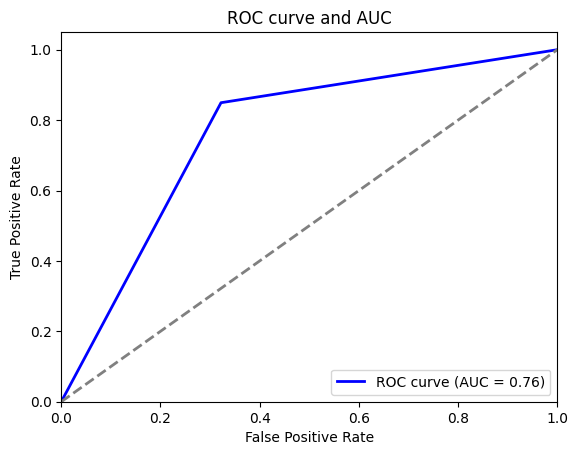

In [ ]:
with device:


    # Entrenar el modelo desde cero
    model_from_scratch = keras.Sequential([
        layers.Conv2D(32, kernel_size=3, strides=2, activation='relu', padding='same', input_shape=(256, 256, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=3, strides=2, activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(2, activation='softmax')
    ])

    model_from_scratch.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model_from_scratch.fit(X_train, y_train, epochs=10, batch_size=64)
    y_pred_prob_from_scratch = model_from_scratch.predict(X_test)

    # Obtener las clases predichas
    y_pred_from_scratch = np.argmax(y_pred_prob_from_scratch, axis=1)

    # Calcular métricas de evaluación
    accuracy_scratch = accuracy_score(y_test, y_pred_from_scratch)
    precision_scratch = precision_score(y_test, y_pred_from_scratch, average='macro')
    f1_scratch = f1_score(y_test, y_pred_from_scratch, average='macro')
    #auc_scratch = roc_auc_score(y_test, model_from_scratch.predict(X_test), average='macro')

    # Imprimir las métricas
    print("Metrics for model trained from scratch:")
    print("Accuracy:", accuracy_scratch)
    print("Precision:", precision_scratch)
    print("F1-Score:", f1_scratch)
    #print("AUC:", auc_scratch)
    print()

    computeMetrics(y_test, y_pred_from_scratch)
    del model_from_scratch
#

In [7]:
from tensorflow.keras import layers, models

with device:
        # Definir y entrenar el autoencoder
        autoencoder = models.Sequential([
            layers.Conv2D(8, kernel_size=3, strides=2, activation='relu', padding='same', input_shape=(256, 256, 3)),
            layers.Conv2D(16, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2DTranspose(3, kernel_size=3, strides=2, activation='sigmoid', padding='same', name='decoded')
            ])

        autoencoder.compile(optimizer='adam', loss='mse')
        autoencoder.fit(X_unlabeled, X_unlabeled, epochs=3, batch_size=8)
        print("Forma convertida:", X_unlabeled.shape)
        print("Forma convertida:", X_unlabeled.shape)
        # Obtener la representación latente de las imágenes con el encoder del autoencoder
        encoder = keras.Model(inputs=autoencoder.input, outputs=autoencoder.layers[2].output)
        X_train_encoded = encoder.predict(X_train)
        X_test_encoded = encoder.predict(X_test)


Epoch 1/3
95/95 [==============================] - 11s 13ms/step - loss: 16465.4180
Epoch 2/3
95/95 [==============================] - 1s 7ms/step - loss: 16451.2480
Epoch 3/3
95/95 [==============================] - 1s 8ms/step - loss: 16447.8555
Forma convertida: (759, 256, 256, 3)
Forma convertida: (759, 256, 256, 3)
5/5 [==============================] - 0s 56ms/step


Test

#Asignacion de datos a binario

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Ruta a la carpeta del conjunto de datos en Google Drive
data_folders =  ["/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Apple___Apple_scab",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Apple___Black_rot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Apple___Cedar_apple_rust",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Apple___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Blueberry___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Cherry___Powdery_mildew",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Cherry___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Corn___Cercospora_leaf_spot Gray_leaf_spot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Corn___Common_rust",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Corn___Northern_Leaf_Blight",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Corn___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Grape___Black_rot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Grape___Esca_(Black_Measles)",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Grape___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Orange___Haunglongbing_(Citrus_greening)",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Peach___Bacterial_spot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Peach___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Pepper,_bell___Bacterial_spot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Pepper,_bell___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Potato___Early_blight",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Potato___Late_blight",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Potato___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Raspberry___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Soybean___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Squash___Powdery_mildew",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Strawberry___Leaf_scorch",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Strawberry___healthy",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Bacterial_spot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Early_blight",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Late_blight",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Leaf_Mold",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Septoria_leaf_spot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Spider_mites Two-spotted_spider_mite",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Target_Spot",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Tomato_Yellow_Leaf_Curl_Virus",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___Tomato_mosaic_virus",
                    "/content/drive/MyDrive/Colab Notebooks/Plant_leave_diseases_dataset/Tomato___healthy"]

    # Definir las etiquetas correspondientes
labels = {
        "Apple___Apple_scab": 1,
        "Apple___Black_rot": 1,
        "Apple___Cedar_apple_rust": 1,
        "Apple___healthy": 0,
        "Blueberry___healthy": 0,
        "Cherry___Powdery_mildew": 1,
        "Cherry___healthy": 0,
        "Corn___Cercospora_leaf_spot Gray_leaf_spot":1,
        "Corn___Common_rust":1,
        "Corn___Northern_Leaf_Blight":1,
        "Corn___healthy":0,
        "Grape___Black_rot":1,
        "Grape___Esca_(Black_Measles)":1,
        "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)":1,
        "Grape___healthy":0,
        "Orange___Haunglongbing_(Citrus_greening)":1,
        "Peach___Bacterial_spot":1,
        "Peach___healthy":0,
        "Pepper,_bell___Bacterial_spot":1,
        "Pepper,_bell___healthy":0,
        "Potato___Early_blight":1,
        "Potato___Late_blight":1,
        "Potato___healthy":0,
        "Raspberry___healthy":0,
        "Soybean___healthy":0,
        "Squash___Powdery_mildew":1,
        "Strawberry___Leaf_scorch":1,
        "Strawberry___healthy":0,
        "Tomato___Bacterial_spot":1,
        "Tomato___Early_blight":1,
        "Tomato___Late_blight":1,
        "Tomato___Leaf_Mold":1,
        "Tomato___Septoria_leaf_spot":1,
        "Tomato___Spider_mites Two-spotted_spider_mite":1,
        "Tomato___Target_Spot":1,
        "Tomato___Tomato_Yellow_Leaf_Curl_Virus":1,
        "Tomato___Tomato_mosaic_virus":1,
        "Tomato___healthy":0
    }


# Listas para almacenar las imágenes y las etiquetas
images = []
label_list = []

# Recorrer las carpetas y cargar las imágenes
for folder in data_folders:
    label = labels.get(os.path.basename(folder), 0)  # Obtener la etiqueta correspondiente
    count = 0  # Variable de conteo
    for filename in os.listdir(folder):
        if count >= 20:  # Controlar el número de archivos leídos
            break
        if filename.lower().endswith((".jpg", ".JPG")):
            image_path = os.path.join(folder, filename)
            image = cv2.imread(image_path)
            images.append(image)
            label_list.append(label)
            count += 1

# Convertir las listas de imágenes y etiquetas a arreglos numpy
images = np.array(images)
labels = np.array(label_list)

# Preprocesamiento y normalización de los datos de entrada (imágenes)
images = images.astype('float32') / 255.0

# Dividir los datos etiquetados en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(608, 256, 256, 3)
(152, 256, 256, 3)
(608,)
(152,)


#Modelo con encoder con pesos congelados

Epoch 1/10
38/38 [==============================] - 5s 39ms/step - loss: 0.0319
Epoch 2/10
38/38 [==============================] - 1s 38ms/step - loss: 0.0127
Epoch 3/10
38/38 [==============================] - 1s 35ms/step - loss: 0.0088
Epoch 4/10
38/38 [==============================] - 1s 36ms/step - loss: 0.0071
Epoch 5/10
38/38 [==============================] - 1s 36ms/step - loss: 0.0065
Epoch 6/10
38/38 [==============================] - 1s 35ms/step - loss: 0.0062
Epoch 7/10
38/38 [==============================] - 1s 36ms/step - loss: 0.0059
Epoch 8/10
38/38 [==============================] - 1s 36ms/step - loss: 0.0057
Epoch 9/10
38/38 [==============================] - 1s 36ms/step - loss: 0.0056
Epoch 10/10
38/38 [==============================] - 1s 38ms/step - loss: 0.0056
Epoch 1/10
38/38 [==============================] - 1s 11ms/step - loss: 0.7954 - accuracy: 0.6579
Epoch 2/10
38/38 [==============================] - 0s 11ms/step - loss: 0.5442 - accuracy: 0.7368
E

,Accuracy,Precision,Recall,F1 Score,AUC
0,0.690789,0.685693,0.88172,0.777251,0.635775


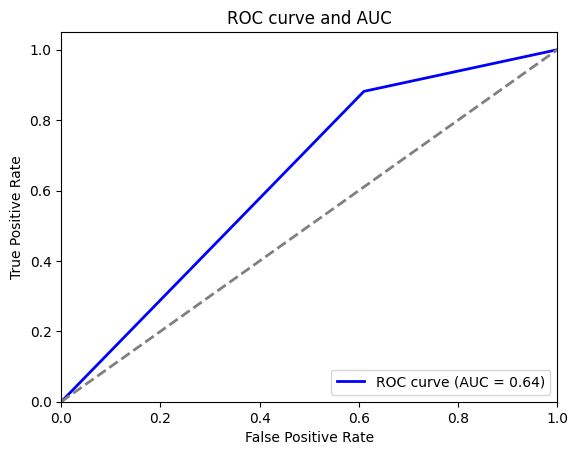

In [ ]:
# Crear el modelo del autoencoder
input_shape = X_train[0].shape

encoder_input = keras.Input(shape=input_shape)
encoder_output = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoder_input)
encoder_output = layers.MaxPooling2D((2, 2), padding='same')(encoder_output)
encoder_output = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoder_output)
encoder_output = layers.MaxPooling2D((2, 2), padding='same')(encoder_output)

decoder_output = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoder_output)
decoder_output = layers.UpSampling2D((2, 2))(decoder_output)
decoder_output = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(decoder_output)
decoder_output = layers.UpSampling2D((2, 2))(decoder_output)
decoder_output = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(decoder_output)

autoencoder = keras.Model(encoder_input, decoder_output)
autoencoder.compile(optimizer='adam', loss='mse')

# Entrenar el autoencoder
autoencoder.fit(X_train, X_train, epochs=10, batch_size=16)

# Obtener la salida del encoder (características latentes)
encoder = keras.Model(encoder_input, encoder_output)
encoder.trainable = False
encoder_output = encoder(encoder_input)

# Crear el modelo basado en el autoencoder
classifier = layers.Flatten()(encoder_output)
classifier = layers.Dense(64, activation='relu')(classifier)
classifier = layers.Dense(1, activation='sigmoid')(classifier)

model = keras.Model(encoder_input, classifier)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo basado en el autoencoder
model.fit(X_train, y_train, epochs=10, batch_size=16)

# Evaluar el modelo
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
#roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)

computeMetrics(y_test, y_pred)
#print("ROC AUC Score:", roc_auc)

#Modelo con encoder sin pesos congelados

Epoch 1/10
38/38 [==============================] - 3s 42ms/step - loss: 0.0383
Epoch 2/10
38/38 [==============================] - 1s 38ms/step - loss: 0.0180
Epoch 3/10
38/38 [==============================] - 1s 38ms/step - loss: 0.0086
Epoch 4/10
38/38 [==============================] - 1s 36ms/step - loss: 0.0067
Epoch 5/10
38/38 [==============================] - 1s 35ms/step - loss: 0.0062
Epoch 6/10
38/38 [==============================] - 1s 35ms/step - loss: 0.0059
Epoch 7/10
38/38 [==============================] - 1s 36ms/step - loss: 0.0058
Epoch 8/10
38/38 [==============================] - 1s 36ms/step - loss: 0.0057
Epoch 9/10
38/38 [==============================] - 1s 36ms/step - loss: 0.0056
Epoch 10/10
38/38 [==============================] - 1s 35ms/step - loss: 0.0055
Epoch 1/10
38/38 [==============================] - 2s 18ms/step - loss: 1.0092 - accuracy: 0.6776
Epoch 2/10
38/38 [==============================] - 1s 15ms/step - loss: 0.5173 - accuracy: 0.7516
E

,Accuracy,Precision,Recall,F1 Score,AUC
0,0.697368,0.68338,0.83871,0.772277,0.656643


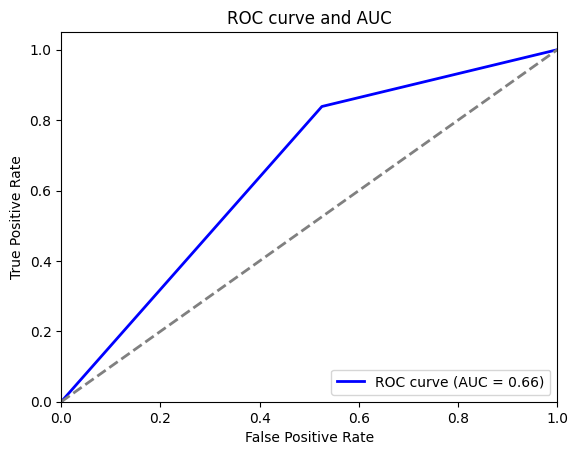

In [ ]:

# Crear el modelo del autoencoder
input_shape = X_train[0].shape

encoder_input = keras.Input(shape=input_shape)
encoder_output = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoder_input)
encoder_output = layers.MaxPooling2D((2, 2), padding='same')(encoder_output)
encoder_output = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoder_output)
encoder_output = layers.MaxPooling2D((2, 2), padding='same')(encoder_output)

decoder_output = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoder_output)
decoder_output = layers.UpSampling2D((2, 2))(decoder_output)
decoder_output = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(decoder_output)
decoder_output = layers.UpSampling2D((2, 2))(decoder_output)
decoder_output = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(decoder_output)

autoencoder = keras.Model(encoder_input, decoder_output)
autoencoder.compile(optimizer='adam', loss='mse')

# Entrenar el autoencoder
autoencoder.fit(X_train, X_train, epochs=10, batch_size=16)

# Obtener la salida del encoder (características latentes)
encoder = keras.Model(encoder_input, encoder_output)

# Crear el modelo basado en el autoencoder
classifier = layers.Flatten()(encoder_output)
classifier = layers.Dense(64, activation='relu')(classifier)
classifier = layers.Dense(1, activation='sigmoid')(classifier)

model = keras.Model(encoder_input, classifier)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo basado en el autoencoder
model.fit(X_train, y_train, epochs=10, batch_size=16)

# Evaluar el modelo
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
#roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)
#print("ROC AUC Score:", roc_auc)

computeMetrics(y_test, y_pred)
#En este código, se ha eliminado la línea encoder.trainable = False
#para que los pesos del encoder no estén congelados y se actualicen
#durante el entrenamiento del clasificador.

#Hipotesis 2

Epoch 1/10
19/19 [==============================] - 7s 130ms/step - loss: 0.0394 - val_loss: 0.0313
Epoch 2/10
19/19 [==============================] - 2s 80ms/step - loss: 0.0242 - val_loss: 0.0157
Epoch 3/10
19/19 [==============================] - 2s 82ms/step - loss: 0.0159 - val_loss: 0.0125
Epoch 4/10
19/19 [==============================] - 1s 79ms/step - loss: 0.0127 - val_loss: 0.0108
Epoch 5/10
19/19 [==============================] - 2s 81ms/step - loss: 0.0115 - val_loss: 0.0100
Epoch 6/10
19/19 [==============================] - 2s 87ms/step - loss: 0.0107 - val_loss: 0.0095
Epoch 7/10
19/19 [==============================] - 2s 90ms/step - loss: 0.0102 - val_loss: 0.0092
Epoch 8/10
19/19 [==============================] - 2s 87ms/step - loss: 0.0099 - val_loss: 0.0089
Epoch 9/10
19/19 [==============================] - 2s 82ms/step - loss: 0.0097 - val_loss: 0.0086
Epoch 10/10
5/5 [==============================] - 0s 13ms/step


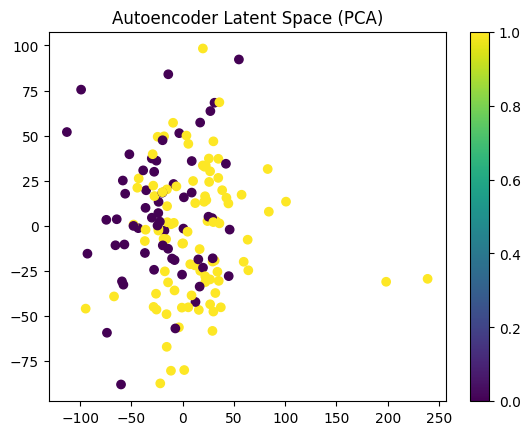

Epoch 1/10
38/38 [==============================] - 7s 36ms/step - loss: 2.0550 - accuracy: 0.6497
Epoch 2/10
38/38 [==============================] - 1s 34ms/step - loss: 0.5571 - accuracy: 0.7023
Epoch 3/10
38/38 [==============================] - 1s 34ms/step - loss: 0.5518 - accuracy: 0.7023
Epoch 4/10
38/38 [==============================] - 1s 35ms/step - loss: 0.5443 - accuracy: 0.7023
Epoch 5/10
38/38 [==============================] - 1s 34ms/step - loss: 0.5360 - accuracy: 0.7023
Epoch 6/10
38/38 [==============================] - 1s 34ms/step - loss: 0.5392 - accuracy: 0.7023
Epoch 7/10
38/38 [==============================] - 1s 34ms/step - loss: 0.5227 - accuracy: 0.7023
Epoch 8/10
38/38 [==============================] - 1s 34ms/step - loss: 0.5262 - accuracy: 0.7072
Epoch 9/10
38/38 [==============================] - 1s 34ms/step - loss: 0.5243 - accuracy: 0.7270
Epoch 10/10
5/5 [==============================] - 0s 21ms/step


,Accuracy,Precision,Recall,F1 Score,AUC
0,0.657895,0.678867,0.946237,0.77193,0.574813


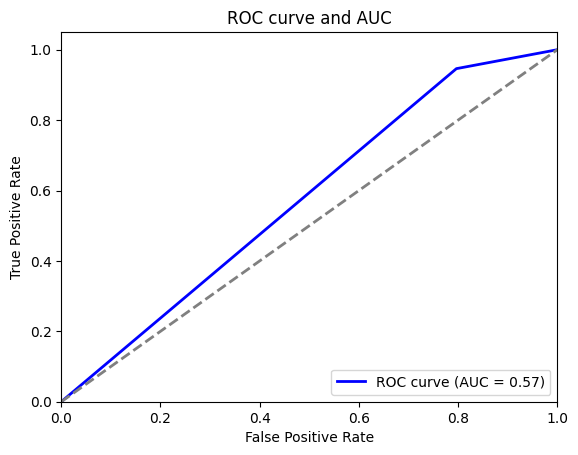

In [8]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Ajustar las dimensiones de los datos de entrada
X_train = X_train.reshape(-1, 256, 256, 3)
X_test = X_test.reshape(-1, 256, 256, 3)

# Definir las capas del Autoencoder
input_img = Input(shape=(256, 256, 3))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Construir el modelo del Autoencoder
autoencoder = Model(input_img, decoded)

# Compilar el modelo
autoencoder.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, validation_data=(X_test, X_test))

# Obtener los vectores latentes
latent_autoencoder = encoder.predict(X_test)

# Aplanar los vectores latentes
latent_autoencoder_flat = latent_autoencoder.reshape(-1, np.prod(latent_autoencoder.shape[1:]))

# Aplicar PCA para reducir la dimensionalidad a 2D
pca = PCA(n_components=2)
latent_pca_autoencoder = pca.fit_transform(latent_autoencoder_flat)

# Visualizar los vectores latentes en un gráfico
plt.scatter(latent_pca_autoencoder[:, 0], latent_pca_autoencoder[:, 1], c=y_test)
plt.title("Autoencoder Latent Space (PCA)")
plt.colorbar()
plt.show()

# Crear el modelo basado en el autoencoder
classifier = layers.Flatten()(decoded)
classifier = layers.Dense(64, activation='relu')(classifier)
classifier = layers.Dense(1, activation='sigmoid')(classifier)

model = keras.Model(input_img, classifier)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo basado en el autoencoder
model.fit(X_train, y_train, epochs=10, batch_size=16)

# Evaluar el modelo
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

computeMetrics(y_test, y_pred)
#print("ROC AUC Score:", roc_auc)


# Con ruido

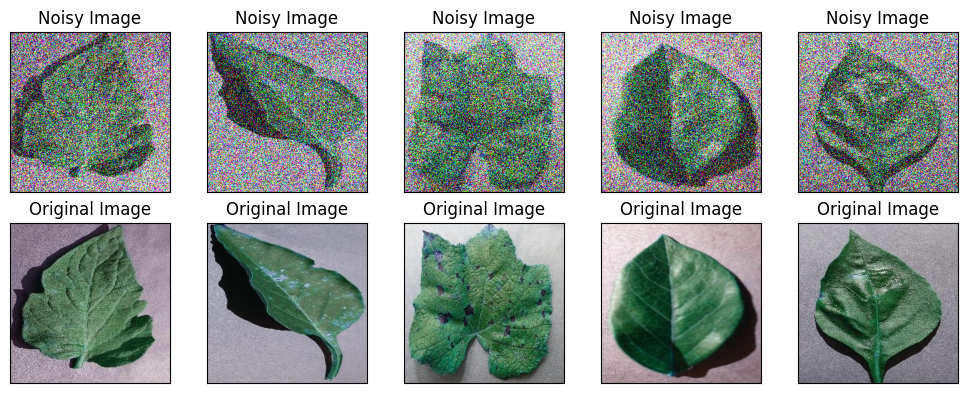

Epoch 1/10
19/19 [==============================] - 5s 123ms/step - loss: 0.0408 - val_loss: 0.0368
Epoch 2/10
19/19 [==============================] - 2s 81ms/step - loss: 0.0272 - val_loss: 0.0155
Epoch 3/10
19/19 [==============================] - 1s 79ms/step - loss: 0.0149 - val_loss: 0.0123
Epoch 4/10
19/19 [==============================] - 2s 81ms/step - loss: 0.0128 - val_loss: 0.0112
Epoch 5/10
19/19 [==============================] - 2s 90ms/step - loss: 0.0119 - val_loss: 0.0106
Epoch 6/10
19/19 [==============================] - 2s 88ms/step - loss: 0.0114 - val_loss: 0.0103
Epoch 7/10
19/19 [==============================] - 2s 89ms/step - loss: 0.0109 - val_loss: 0.0098
Epoch 8/10
19/19 [==============================] - 2s 83ms/step - loss: 0.0106 - val_loss: 0.0096
Epoch 9/10
19/19 [==============================] - 2s 91ms/step - loss: 0.0104 - val_loss: 0.0094
Epoch 10/10
5/5 [==============================] - 0s 12ms/step


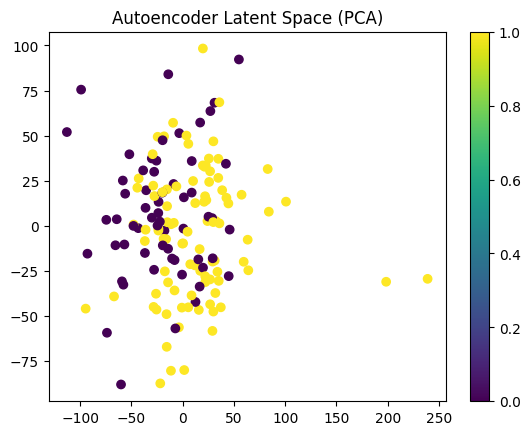

Epoch 1/10
38/38 [==============================] - 6s 38ms/step - loss: 8.3996 - accuracy: 0.6612
Epoch 2/10
38/38 [==============================] - 1s 35ms/step - loss: 0.5439 - accuracy: 0.7023
Epoch 3/10
38/38 [==============================] - 1s 35ms/step - loss: 0.5301 - accuracy: 0.7072
Epoch 4/10
38/38 [==============================] - 1s 35ms/step - loss: 0.4967 - accuracy: 0.7188
Epoch 5/10
38/38 [==============================] - 1s 35ms/step - loss: 0.5028 - accuracy: 0.7188
Epoch 6/10
38/38 [==============================] - 1s 35ms/step - loss: 0.4770 - accuracy: 0.7582
Epoch 7/10
38/38 [==============================] - 1s 36ms/step - loss: 0.4676 - accuracy: 0.7451
Epoch 8/10
38/38 [==============================] - 1s 37ms/step - loss: 0.4401 - accuracy: 0.7878
Epoch 9/10
38/38 [==============================] - 1s 38ms/step - loss: 0.4305 - accuracy: 0.8059
Epoch 10/10
5/5 [==============================] - 0s 31ms/step


,Accuracy,Precision,Recall,F1 Score,AUC
0,0.657895,0.650709,0.903226,0.763636,0.587206


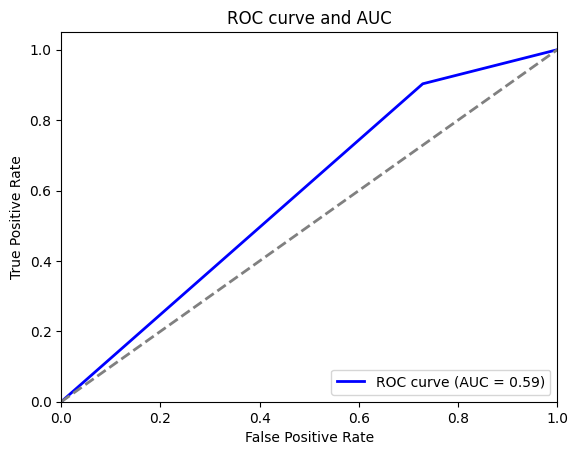

In [14]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

# Ajustar las dimensiones de los datos de entrada
X_train = X_train.reshape(-1, 256, 256, 3)
X_test = X_test.reshape(-1, 256, 256, 3)

# Generar imágenes con ruido
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Definir las capas del Autoencoder
input_img = Input(shape=(256, 256, 3))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)


# Mostrar una imagen con ruido y su correspondiente imagen original
plt.figure(figsize=(10, 4))
for i in range(5):
    # Imagen con ruido
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(X_train_noisy[i])
    plt.title('Noisy Image')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagen original
    ax = plt.subplot(2, 5, i + 6)
    plt.imshow(X_train[i])
    plt.title('Original Image')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

# Construir el modelo del Autoencoder
autoencoder = Model(input_img, decoded)

# Compilar el modelo
autoencoder.compile(optimizer='adam', loss='mse')

# Entrenar el modelo con las imágenes ruidosas
autoencoder.fit(X_train_noisy, X_train, epochs=10, batch_size=32, validation_data=(X_test_noisy, X_test))

# Obtener los vectores latentes de las imágenes sin ruido
latent_autoencoder = encoder.predict(X_test)

# Aplanar los vectores latentes
latent_autoencoder_flat = latent_autoencoder.reshape(-1, np.prod(latent_autoencoder.shape[1:]))

# Aplicar PCA para reducir la dimensionalidad a 2D
pca = PCA(n_components=2)
latent_pca_autoencoder = pca.fit_transform(latent_autoencoder_flat)

# Visualizar los vectores latentes en un gráfico
plt.scatter(latent_pca_autoencoder[:, 0], latent_pca_autoencoder[:, 1], c=y_test, cmap='viridis')
plt.title("Autoencoder Latent Space (PCA)")
plt.colorbar()
plt.show()

# Crear el modelo basado en el autoencoder
classifier = layers.Flatten()(decoded)
classifier = layers.Dense(64, activation='relu')(classifier)
classifier = layers.Dense(1, activation='sigmoid')(classifier)

model = keras.Model(input_img, classifier)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo basado en el autoencoder
model.fit(X_train, y_train, epochs=10, batch_size=16)

# Evaluar el modelo
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

computeMetrics(y_test, y_pred)

